In [2]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Reshape, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Activation, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [3]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv("D:\\DS CLUB\\Restaurent Review\\Dataset\\training_data.csv")
print(df)

                                          Clean_review  Label
0                                      wow loved place      1
1                                       crust not good      0
2                         not tasty texture just nasty      0
3    stopped late bank holiday rick steve recommend...      1
4                          selection menu great prices      1
..                                                 ...    ...
995      think food should have flavor texture lacking      0
996                            appetite instantly gone      0
997            overall not impressed would not go back      0
998  experience underwhelming think just go ninja s...      0
999  hadnt wasted enough life poured salt wound dra...      0

[1000 rows x 2 columns]


In [ ]:
# # Load CountVectorizer đã lưu
# count_vectorizer = joblib.load("D:\\DS CLUB\\Restaurent Review\\Dataset\\vectorizer.pkl")


In [ ]:
# # Chuyển đổi văn bản thành vector đặc trưng
# X_train = count_vectorizer.transform(df["Clean_review"])

# # Do CountVectorizer trả về ma trận sparse, bạn cần chuyển đổi nó thành array nếu cần (sử dụng cho Keras)
# X_train = X_train.toarray().astype('float32')  

# # # Nếu bạn muốn padding (nếu sử dụng Keras và mạng nơ-ron)
# # sequence_length = 20  # Độ dài cố định cho các câu
# # X_train = pad_sequences(X_train, maxlen=sequence_length)

# # Lấy nhãn
# y_train = df["Label"].values.astype('float32')


In [4]:
# Load TF-IDF đã lưu
tfidf_vectorizer = joblib.load("D:\\DS CLUB\\Restaurent Review\\Dataset\\tfidf_vectorizer.pkl")

# Chuyển đổi văn bản thành vector đặc trưng TF-IDF
X = tfidf_vectorizer.transform(df["Clean_review"]).toarray().astype('float32')


In [5]:
# Lấy nhãn
y = df["Label"].values.astype('float32')


In [ ]:
# # Chia train/test
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [6]:
# Chia train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
print("Test set size: " + str(X_test.shape[0]))


Test set size: 200


In [ ]:
# # Đảm bảo padding cho X_train và X_test
# sequence_length = 20
# X_train = pad_sequences(X_train, maxlen=sequence_length)
# X_test = pad_sequences(X_test, maxlen=sequence_length)

In [ ]:
# # Chuẩn hóa dữ liệu train & test
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
# # Kích thước tham số
# max_features = 10000
# embedding_dim = 100
# num_filters = 50

# inputs = Input(shape=(sequence_length,), dtype='float32')

# # Lớp Embedding (Học trong quá trình training)
# embedding_layer = Embedding(input_dim=max_features, output_dim=embedding_dim)(inputs)

# # Định hình lại dữ liệu đầu vào cho CNN
# reshape = Reshape((sequence_length, embedding_dim, 1))(embedding_layer)

# # Các lớp CNN với kernel size khác nhau
# conv_0 = Conv2D(num_filters, kernel_size=(3, embedding_dim), kernel_regularizer=l2(0.001))(reshape)
# conv_0 = BatchNormalization()(conv_0)
# conv_0 = Activation('relu')(conv_0)

# conv_1 = Conv2D(num_filters, kernel_size=(4, embedding_dim), kernel_regularizer=l2(0.001))(reshape)
# conv_1 = BatchNormalization()(conv_1)
# conv_1 = Activation('relu')(conv_1)

# conv_2 = Conv2D(num_filters, kernel_size=(5, embedding_dim), kernel_regularizer=l2(0.001))(reshape)
# conv_2 = BatchNormalization()(conv_2)
# conv_2 = Activation('relu')(conv_2)

# # Max Pooling
# maxpool_0 = MaxPool2D(pool_size=(sequence_length - 3 + 1, 1), strides=(1,1), padding='valid')(conv_0)
# maxpool_1 = MaxPool2D(pool_size=(sequence_length - 4 + 1, 1), strides=(1,1), padding='valid')(conv_1)
# maxpool_2 = MaxPool2D(pool_size=(sequence_length - 5 + 1, 1), strides=(1,1), padding='valid')(conv_2)

# # Gộp các đặc trưng từ CNN
# concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
# flatten = Flatten()(concatenated_tensor)

# # Dropout để giảm overfitting
# dropout = Dropout(0.5)(flatten)

# # Lớp Fully Connected để phân loại
# output = Dense(units=1, activation='sigmoid')(dropout)

In [ ]:
# model = Model(inputs=inputs, outputs=output)
# optimizer = Adam(learning_rate=0.0001)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# print(model.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 20, 100)   │  1,000,000 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_3 (Reshape) │ (None, 20, 100,   │          0 │ embedding_2[0][0] │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 18, 1, 50) │     15,050 │ reshape_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 17, 1, 50) │     20,050 │ reshape_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 1, 50) │     25,050 │ reshape_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 18, 1, 50) │        200 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 17, 1, 50) │        200 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 1, 50) │        200 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 18, 1, 50) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 17, 1, 50) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 16, 1, 50) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 1, 1, 50)  │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 1, 1, 50)  │          0 │ activation_4[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 1, 1, 50)  │          0 │ activation_5[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 3, 1, 50)  │          0 │ max_pooling2d_6[… │
│ (Concatenate)       │                   │            │ max_pooling2d_7[… │
│                     │                   │            │ max_pooling2d_8[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 150)       │          0 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 150)       │          0 │ flatten_2[0][0] 

 Total params: 1,060,901 (4.05 MB)

 Trainable params: 1,060,601 (4.05 MB)

 Non-trainable params: 300 (1.17 KB)

None


In [ ]:
# batch_size = 32
# # Huấn luyện mô hình với dữ liệu huấn luyện
# history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.5052 - loss: 0.7003 - val_accuracy: 0.5200 - val_loss: 0.6977
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.4954 - loss: 0.6954 - val_accuracy: 0.5250 - val_loss: 0.6973
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.5154 - loss: 0.6922 - val_accuracy: 0.5250 - val_loss: 0.6970
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.5022 - loss: 0.6934 - val_accuracy: 0.4900 - val_loss: 0.6967
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.4919 - loss: 0.6915 - val_accuracy: 0.4900 - val_loss: 0.6965
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.5240 - loss: 0.6919 - val_accuracy: 0.4850 - val_loss: 0.6962
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.5152 - loss: 0.6910 - val_accuracy: 0.4850 - val_loss: 0.6960
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.5166 - loss: 0.6939 - val_accuracy: 0

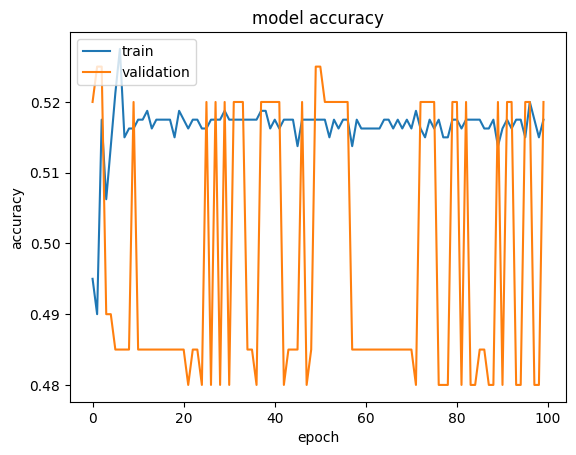

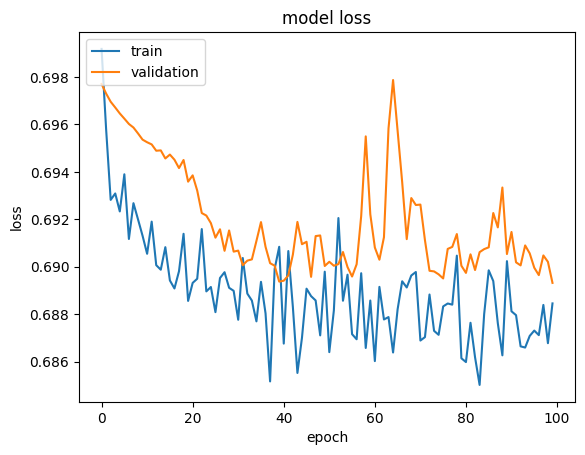

In [ ]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

In [ ]:
# # Giả sử bạn đã có tập kiểm tra X_test và y_test
# loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)

# print(f"Test Loss: {loss}")
# print(f"Test Accuracy: {accuracy}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4843 - loss: 0.6990
Test Loss: 0.6990345120429993
Test Accuracy: 0.49000000953674316


In [ ]:
# # Đánh giá mô hình trên tập kiểm tra
# loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
# print(f"Test Loss: {loss}")
# print(f"Test Accuracy: {accuracy}")

# # Dự đoán nhãn cho tất cả các ví dụ trong X_test
# predictions = model.predict(X_test, batch_size=32)

# # Nếu là phân loại nhị phân với sigmoid
# predicted_labels = (predictions > 0.5).astype(int)

# # In kết quả dự đoán so với nhãn thực tế
# print(f"Predicted Labels: {predicted_labels[100:120]}")  # In 10 kết quả đầu tiên
# print(f"True Labels: {y_test[100:120]}")  # In 10 nhãn thực tế


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4843 - loss: 0.6990
Test Loss: 0.6990345120429993
Test Accuracy: 0.49000000953674316
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Labels: [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
True Labels: [1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1.]


In [80]:
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional, Attention, GlobalAveragePooling1D, Reshape
# Kích thước tham số
sequence_length = X_train.shape[1]  # Số chiều của TF-IDF

inputs_bilstm = Input(shape=(sequence_length, 1))  # TF-IDF cần thêm 1 chiều

# Reshape để phù hợp với LSTM
reshape_bilstm = Reshape((sequence_length, 1))(inputs_bilstm)

# Lớp BiLSTM
bi_lstm = Bidirectional(LSTM(64, return_sequences=True))(reshape_bilstm)

# Attention cơ bản
attention_bilstm = Attention()([bi_lstm, bi_lstm])
avg_pool_bilstm = GlobalAveragePooling1D()(attention_bilstm)

# Dropout để giảm overfitting
dropout_bilstm = Dropout(0.5)(avg_pool_bilstm)

# Lớp Fully Connected để phân loại
output_bilstm = Dense(1, activation='sigmoid')(dropout_bilstm)

# Tạo mô hình
bilstm_model = Model(inputs_bilstm, output_bilstm)

# Compile mô hình
bilstm_model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Hiển thị mô hình
print(bilstm_model.summary())

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 1000, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_4 (Reshape) │ (None, 1000, 1)   │          0 │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 1000, 128) │     33,792 │ reshape_4[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_1         │ (None, 1000, 128) │          0 │ bidirectional_1[… │
│ (Attention)         │                   │            │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ attention_1[0][0] │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 128)       │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │        129 │ dropout_6[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 33,921 (132.50 KB)

 Trainable params: 33,921 (132.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [82]:
# Thêm 1 chiều cho TF-IDF để phù hợp với mô hình (nếu chưa làm)
X_train_reshaped = X_train[..., np.newaxis]  
X_test_reshaped = X_test[..., np.newaxis]  

# Cấu hình batch size và số epochs
batch_size = 32
epochs = 20

# Huấn luyện mô hình
bilstm_history = bilstm_model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_test_reshaped, y_test),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4918 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5250 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4865 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4939 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4818 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5200 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5105 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5016 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss:

KeyboardInterrupt: 

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Xây dựng mô hình MLP
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),  # Giảm dropout để tránh mất quá nhiều thông tin

    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  
])

# Compile mô hình
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình với EarlyStopping + ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, reduce_lr], verbose=1)

# Hiển thị tổng quan mô hình
print(model.summary())


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.4890 - loss: 2.5943 - val_accuracy: 0.5000 - val_loss: 1.9655 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6655 - loss: 1.8849 - val_accuracy: 0.5000 - val_loss: 1.8031 - learning_rate: 0.0010
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7939 - loss: 1.5476 - val_accuracy: 0.5000 - val_loss: 1.7325 - learning_rate: 0.0010
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8428 - loss: 1.3754 - val_accuracy: 0.5000 - val_loss: 1.6841 - learning_rate: 0.0010
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8692 - loss: 1.3058 - val_accuracy: 0.5000 - val_loss: 1.6473 - learning_rate: 0.0010
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9124 - loss: 1.1737 - val_accuracy: 0.5000 - val_loss: 1.6103 - learning_rate: 0.0010
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9385 - loss: 1.0747 - 

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 64)             │        64,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,965 (785.02 KB)

 Trainable params: 66,913 (261.38 KB)

 Non-trainable params: 224 (896.00 B)

 Optimizer params: 133,828 (522.77 KB)

None


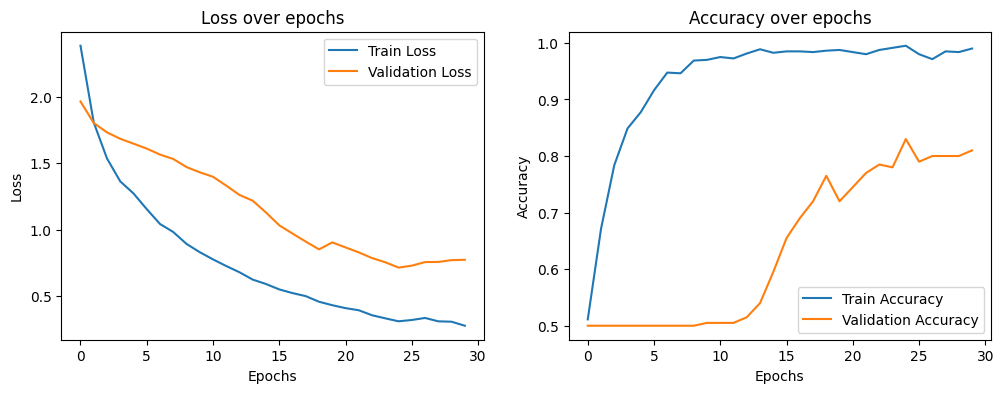

In [100]:
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs')

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.show()

In [102]:
# Dự đoán nhãn cho tập test
y_pred = model.predict(X_test)

# Chuyển kết quả về nhãn nhị phân (0 hoặc 1)
y_pred_labels = (y_pred > 0.5).astype(int)

# In 10 dòng đầu tiên của tập test
for i in range(20):
    print(f"Review {i+1}: Predicted Label = {y_pred_labels[i][0]}, True Label = {y_test[i]}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Review 1: Predicted Label = 1, True Label = 1.0
Review 2: Predicted Label = 0, True Label = 0.0
Review 3: Predicted Label = 0, True Label = 0.0
Review 4: Predicted Label = 0, True Label = 0.0
Review 5: Predicted Label = 1, True Label = 1.0
Review 6: Predicted Label = 1, True Label = 1.0
Review 7: Predicted Label = 1, True Label = 1.0
Review 8: Predicted Label = 0, True Label = 1.0
Review 9: Predicted Label = 0, True Label = 0.0
Review 10: Predicted Label = 0, True Label = 0.0
Review 11: Predicted Label = 1, True Label = 1.0
Review 12: Predicted Label = 1, True Label = 1.0
Review 13: Predicted Label = 1, True Label = 1.0
Review 14: Predicted Label = 0, True Label = 0.0
Review 15: Predicted Label = 0, True Label = 0.0
Review 16: Predicted Label = 0, True Label = 0.0
Review 17: Predicted Label = 1, True Label = 1.0
Review 18: Predicted Label = 0, True Label = 0.0
Review 19: Predicted Label = 0, True Label = 1.0
Review 20: Predicted Label = 0, True Lab

In [ ]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # Dự đoán nhãn cho tập test
# y_pred = model.predict(X_test)

# # Chuyển kết quả về nhãn nhị phân (0 hoặc 1)
# y_pred_labels = (y_pred > 0.5).astype(int)

# # Tạo ma trận nhầm lẫn
# cm = confusion_matrix(y_test, y_pred_labels)

# # Vẽ ma trận nhầm lẫn
# plt.figure(figsize=(6,5))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()


NameError: name 'model' is not defined

In [8]:
from sklearn.naive_bayes import BernoulliNB

nb_clf = BernoulliNB()
nb_clf.fit(X_train, y_train)

BernoulliNB()

In [9]:
test_ds_predicted = nb_clf.predict(X_test)

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test,test_ds_predicted))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83       100
         1.0       0.83      0.85      0.84       100

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



<Axes: >

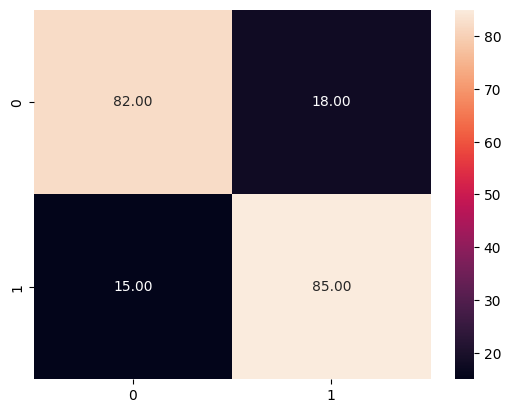

In [13]:
import seaborn as sns

cm = metrics.confusion_matrix(y_test, test_ds_predicted)
sns.heatmap(cm, annot=True, fmt = '.2f')

In [16]:
results = pd.DataFrame({
    'True Labels': y_test,  # Nhãn thực tế
    'Predicted Labels': test_ds_predicted  # Nhãn dự đoán
})

print(results.head(20))

    True Labels  Predicted Labels
0           1.0               1.0
1           0.0               0.0
2           0.0               0.0
3           0.0               1.0
4           1.0               1.0
5           1.0               1.0
6           1.0               1.0
7           1.0               0.0
8           0.0               0.0
9           0.0               0.0
10          1.0               1.0
11          1.0               0.0
12          1.0               1.0
13          0.0               0.0
14          0.0               1.0
15          0.0               0.0
16          1.0               1.0
17          0.0               0.0
18          1.0               0.0
19          0.0               0.0
